# Singular-Value Decomposition of Images


© by A.Richter

<img src=88x31.png  width="10%" style="float: left;"> 

**Preface:**

As you may have seen in the notebooks before (-04-Basics-of-image-processing) Images are often handled in form of nummeric python (numpy) array's. Numpy array's are simply speaking nothing else than a representation of matrix structures in the computers memory.

Based on that we can say very general that every algebraic matrix operation can also be applied to a numpy array structure. 

Singularvalue Decomposition is a technique used in linear algebra to split one matrix into three separate matrices which represent the same ammount of information. It's information is only shown from a different viewpoint.

In this notebook we will have a look on the details how this technique works in the context of image processing.

## Overview of the notebook:

   1. [Basic Library Imports and Variables](#basic)
   2. [An Eigen-Values Primer](#eigen)
   3. [Images and Eigenvalues](#IMeigen)
   4. [Singularvalues](#singular)
   5. [Image (Matrix) Singular Value Decomposition (SVD)](#Decomp)

## Basic Library Imports and Variables <a name="basic"> </a>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import io as skio

The below imported image will be available in the next step in form of a 620 rows by 475 cols numpy array (Im).

(620, 475)
uint8


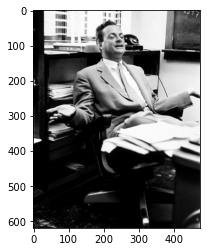

In [75]:
Im=skio.imread('feynman.png')
print(Im.shape)
print(Im.dtype)
plt.imshow(Im, cmap='gray')
plt.show()

In [76]:
print(Im[200:205,200:205])

[[182 140  91  48  18]
 [182 174 133  72  10]
 [177 175 145 108  59]
 [167 166 152 122  71]
 [161 156 147 125  86]]


To explain **Singular-Value-Decomposition** I have to explain first the terms **Eigenvalues** and **Singularvalues** because both are closely connected and used in this technique.


## An Eigen-Values Primer <a name="eigen"> </a>

The so called **Eigenvalues** $\lambda$ of a squared matrix $A_{n,n}$ are characteristic numbers for every matrix or array that fullfill the following equation:  

 [1] $\hspace{1cm}$  $A_{n,n} \vec x = \lambda \vec x$ 

I am interested in the values of $\lambda$ and $\vec x$ that fulfill this equation.
To answere this question I have to find at first one of the solutions $\lambda_i$ and with this I can find the corresponding vector $ \vec x_i$. There are as many solutions $\lambda_i$ as there are row/cols in the matrix $A_{n,n}$, so in this case $n$.

To solve this equation according to $\lambda$ the following manipulations can be done:

$A_{n,n} \vec x = \lambda E_{n,n} \vec x$  ......(where $E_{n,n}$ is the Unit-Matrix of dimension n)

$A_{n,n} \vec x - \lambda E_{n,n} \vec x= 0$  

$(A_{n,n} - \lambda E_{n,n} ) \cdot \vec x = 0$  

accordingly whether $\vec x $ or $(A_{n,n} - \lambda E_{n,n} )$ have to be null.

Ignoring the trivail solution of $\vec x =0$ makes sense because it doesn't give any new information.

$(A_{n,n} - \lambda E_{n,n} ) = 0$ is a far more promising. 

This can be done by evaluating the determinat of the algebraic equation which leads to the so called **characteristic polynom** and is expressed for every symmetric matrix **$A_{n,n}$** alike this:
                $ p_n (\lambda) = det(A_{n,n} - \lambda \cdot E_{n,n} )$

**characteristic polynom** : $ p_n (\lambda) = det(A_{n,n} - \lambda \cdot E_{n,n} )$

For example the determinant det(...) of the matrix $A = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix}$  is det (A) = $\begin{vmatrix}
a & b\\
c & d
\end{vmatrix}$ = $ a \cdot d - c \cdot b$

for further information on higher dimensions determinants see also: https://de.wikipedia.org/wiki/Determinante 

To calculate the Eigenvalues, we need the characteristic polynom to be zero, so:                 $det(A_{n,n} - \lambda \cdot E_{n,n} ) = 0$
                
This equation results in a **polynom in $\lambda$** of **degree n** according to the dimensions of $A_{n,n}$

Polynoms of **degree n** always have **n - Zero crossings**  $\lambda_i $ which are the so called **Eigenvalues**.

When a found solution $\lambda_i$ is placed in the original equation [1] from above the so called **Eigenvector** $\vec x_i$ can be determined.

So for **each Eigenvalue** there is a corresponding **Eigenvector**.

The **Singular-Values** are the **square roots of any non-negative Eigenvalues**.

The Eigenvalues can be sorted ascending according to their size. 

The biggest Eigenvalue $\lambda_i$ represents the biggest part of the information in the matrix $A_{n,n}$. 

The corresponding Eigenvectors can also be sorted in the same order like the Eigenvalues creating a new (transformation-) matrix. 

This matrix of Eigenvectors is the transformation matrix used in the so called **Principal Component Analysis** (PCA - for details see Notebook **-07a-PCA-Example**) 

References:

  - https://de.wikipedia.org/wiki/Eigenwertproblem
  - https://de.wikipedia.org/wiki/Hauptkomponentenanalyse
  - https://simple.wikipedia.org/wiki/Eigenvalues_and_eigenvectors
  - https://de.wikipedia.org/wiki/Singul%C3%A4rwertzerlegung
  


## Images and Eigenvalues <a name="IMeigen"> </a>

How can I use this theoretical considerations about Eigenvalues now for working with an image. As stated before image processing in python mostly uses numpy arrays. A numpy array is nothing else than a big matrix of which I can compute the Eigenvalues.

Normally arbitrary image data is not squarred and has a different number of rows and cols.

Calculating the Eigenvalues of a non-squared matrix demands a separation into **Left-sided** and **Right-sided Eigenvalues** depending on how the Eigenvalue problem in equation [1]
is written. 

The matrix A is of the form $A_{n,m}$ 

 $((A A^T)_{n,n}- \lambda \cdot E_{n,n}) \cdot \vec x_r = \vec 0 $ ... calculates the **Right-sided Eigenvalue problem** 
 
 $ \vec x^T_l \cdot ((A^T A)_{m,m}- \lambda \cdot E_{m,m})  = \vec 0^T $ ... calculates the **Left-sided Eigenvalue problem**
 
Both calculations have to be executed and the Eigenvectors to each Eigenvalue are ordered by size next to each other to form the new matrices 

$ U = [\vec x^1_l ... \vec x^n_l]$ as Left-Eigenvectors

and

$ V = [\vec x^1_r ... \vec x^n_r]$ as Right-Eigenvectors

 

## Singularvalues <a name="singular"> </a>

The Eigenvalues corresponding to these Eigenvector Matrices s... Singular Values

With these the decomposition is done for example with a function from the scipy packedge **linalg** for linear algebraic manipulations.  


Here is an example how to calculate the Eigenvalues and the Eigenvectors of a small matrix $A_{3,3}$. So three Eigenvalues and three Eigenvectors have to be determined.

In [77]:
A33=np.array([[8,1],[5,4]])
print(A33) 

[[8 1]
 [5 4]]


To check my results I can use the numpy.linalg method **numpy.linalg.eigvals()**

In [78]:
import numpy.linalg as lina
print('Eigenvalues:',lina.eigvals(A33))

Eigenvalues: [9. 3.]


Or in case that eigenvalues are double I can get the count with the sympy package and the Matrix-Object

In [79]:
from sympy import *
A22=Matrix([[8,1],[5,4]])
A22.eigenvals()

{9: 1, 3: 1}

To get also the corresponding **Eigenvectors** I can use the method **numpy.linalg.eig()**

In [80]:
print(lina.eig(A33))

(array([9., 3.]), array([[ 0.70710678, -0.19611614],
       [ 0.70710678,  0.98058068]]))


So if I am interested to do the same with a real image which is normally not squared but rectangular, I have to concider to calculate the Eigenvector equations once from the left side but also from the right side (normal approach - in case of a squared matrix). 

This will result in two sets of Eigenvectors the **left-sided** and the **right-sided Eigenvectors**. 

This leads to another technique the so called **Singular-Value Decomposition**.

## Image (Matrix) Singular Value Decomposition (SVD)  <a name="Decomp"> </a>


**U:** Left-Eigenvectors, **s:** Main-diagonal-singularvalues, **V:** Right-Eigenvectors

The image **Im** is separated into three matrices:

In [81]:
U,s,V = lina.svd(Im)

First fife **Left-sided Eigenvectors** part of the U-Matrix (mind the indices and the shape of U...)

In [82]:
print(U[0:5,0:5])

print(U.shape)

[[-0.06337826 -0.06813793 -0.03949799  0.03130896 -0.02365377]
 [-0.06354837 -0.06656503 -0.04198677  0.03013823 -0.02330611]
 [-0.06366246 -0.06650973 -0.04191962  0.02877278 -0.02381717]
 [-0.06403888 -0.06760267 -0.04043287  0.0256228  -0.02046549]
 [-0.06571077 -0.06761753 -0.03635292  0.01288182 -0.00559822]]
(620, 620)


First fife **Singular-values** ordered by size (mind the indices and the shape of s...)

In [83]:
print(s[0:5])

print(s.shape)

[63782.97670559 21856.45316263 12134.64737866 10667.45888074
  8325.89949879]
(475,)


s is here a list of values, but will be expanded to a Matrix with these Values on the main diagonal

First fife **Right-sided Eigenvectors** are part of V-Matrix (mind the indices and the shape of U...)

In [84]:
print(V[0:5,0:5])

print(V.shape)

[[-0.01398234 -0.01300744 -0.0121086  -0.01087143 -0.00891217]
 [ 0.02566071  0.02443877  0.02400383  0.02336518  0.02262387]
 [-0.00593631 -0.00327502  0.00354954  0.01211057  0.01194721]
 [ 0.01860337  0.01733479  0.01755621  0.01828039  0.0217715 ]
 [-0.02577338 -0.02143315 -0.01549026 -0.00699806  0.00254486]]
(475, 475)


So as I can see from the dimensions **U-Matrix(620x620)**, the **s-Vector(475,1)** and the **V-Matrix(475,475)** are the results of the decomposition.

In [85]:
print( U.shape)
print( s.shape)
print( V.shape)

(620, 620)
(475,)
(475, 475)


Here is also the original image **Im** for a comparison of the dimensions:

image size:  (620, 475)


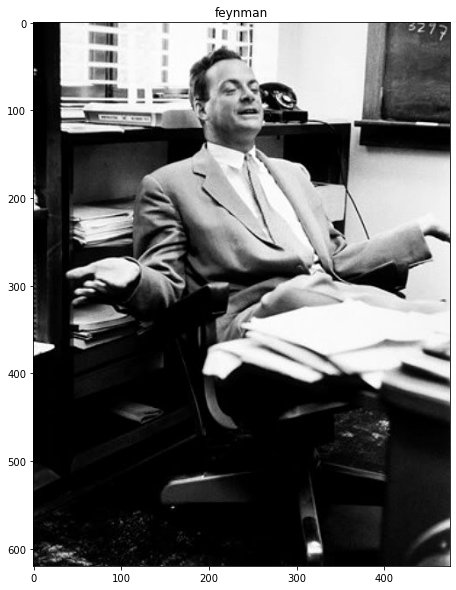

In [86]:
print('image size: ', Im.shape)
plt.figure(figsize=(20,10))
plt.imshow(Im, cmap = 'gray')
plt.title('feynman')
plt.show()

As mentioned above the information is the same 
---
wether the image is stored in one array **Im** or in three matrices **U,S,V**

To build the image from the USV Matrixes the eigenvalues have to be chosen by their size.
The following code is putting the number of k Eigenvalues on the diagonal of the S-Matrix

In [87]:
S=np.zeros(Im.shape);

# some eigenvalues
k=4;  
for i in range(0,k):
    S[i,i]=s[i]

The rest of the Matrix S remains equal to zero!

Increase the number of k to include more Eigenvalues in the Composition of the image

Printing the decomposition matrices for an overview 

In [88]:
print(s[0:4])

[63782.97670559 21856.45316263 12134.64737866 10667.45888074]


In [89]:
print( S[0:4,0:4])

[[63782.97670559     0.             0.             0.        ]
 [    0.         21856.45316263     0.             0.        ]
 [    0.             0.         12134.64737866     0.        ]
 [    0.             0.             0.         10667.45888074]]


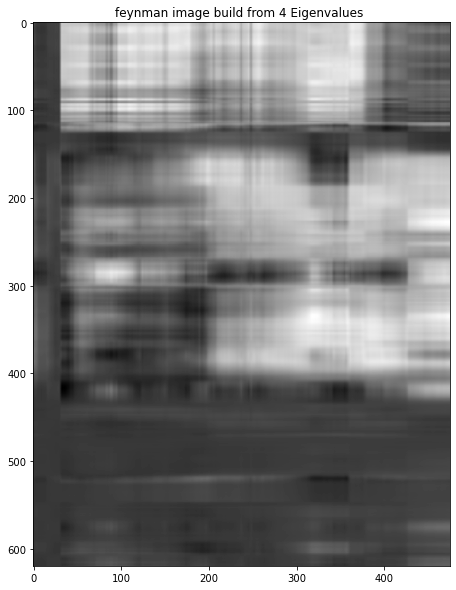

In [90]:
ImageUSV=np.dot(np.dot(U,S),V)
plt.figure(figsize=(20,10))
plt.title('feynman image build from 4 Eigenvalues ')
plt.imshow(ImageUSV,cmap='gray')

In [91]:
S=np.zeros(Im.shape);
k=20;  
for i in range(0,k):
    S[i,i]=s[i]

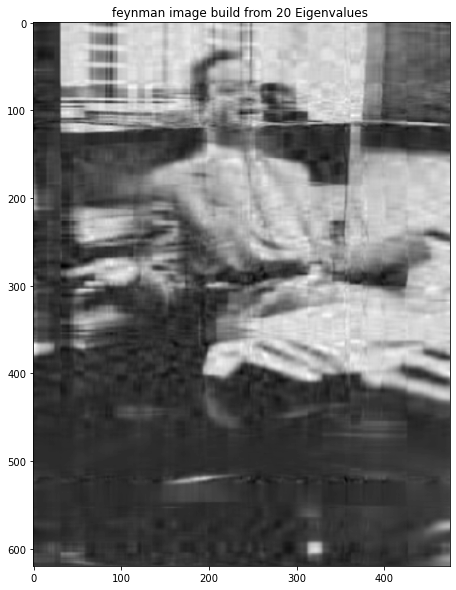

In [92]:
ImageUSV=np.dot(np.dot(U,S),V)
plt.figure(figsize=(20,10))
plt.title('feynman image build from 20 Eigenvalues ')
plt.imshow(ImageUSV,cmap='gray')

In [93]:
S=np.zeros(Im.shape);
k=50;  
for i in range(0,k):
    S[i,i]=s[i]

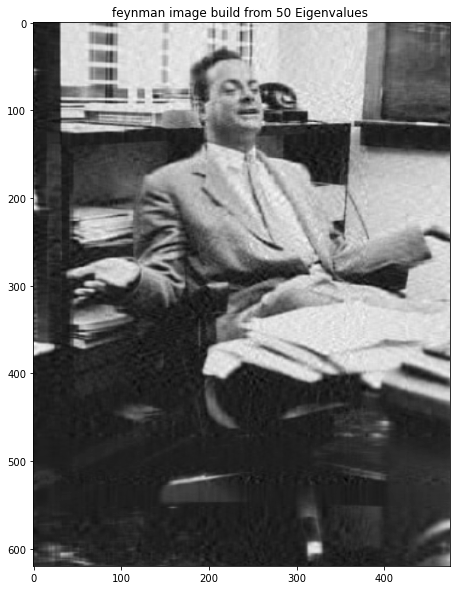

In [94]:
ImageUSV=np.dot(np.dot(U,S),V)
plt.figure(figsize=(20,10))
plt.title('feynman image build from 50 Eigenvalues ')
plt.imshow(ImageUSV,cmap='gray')

Further references: 
  - http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#Basic-interact
  - https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/
  - http://stackoverflow.com/questions/1730600/principal-component-analysis-in-python
  - http://sebastianraschka.com/Articles/2014_pca_step_by_step.html